<a href="https://www.kaggle.com/code/nguynthgiaolinh/n01-ph-n-l-p-d-li-u-b-nh-nh-n-vi-m-gan?scriptVersionId=96994858" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Các bước đọc và xử lý dữ liệu

Khai báo các thư viện bắt buộc

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

###### 1.Đọc bộ dữ liệu HEPATITIS và kiểm tra hình dạng dữ liệu

In [2]:
## Đọc "hepatitis.csv" 
# target =  1: Die; 2: Live 
data = pd.read_csv("../input/hepatitis-dataset/hepatitis.csv", na_values="?")

In [3]:
#Hình dạng dữ liệu
data.shape
data.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


###### 2. Kiểm tra thống kê cơ bản của dữ liệu

In [4]:
data.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


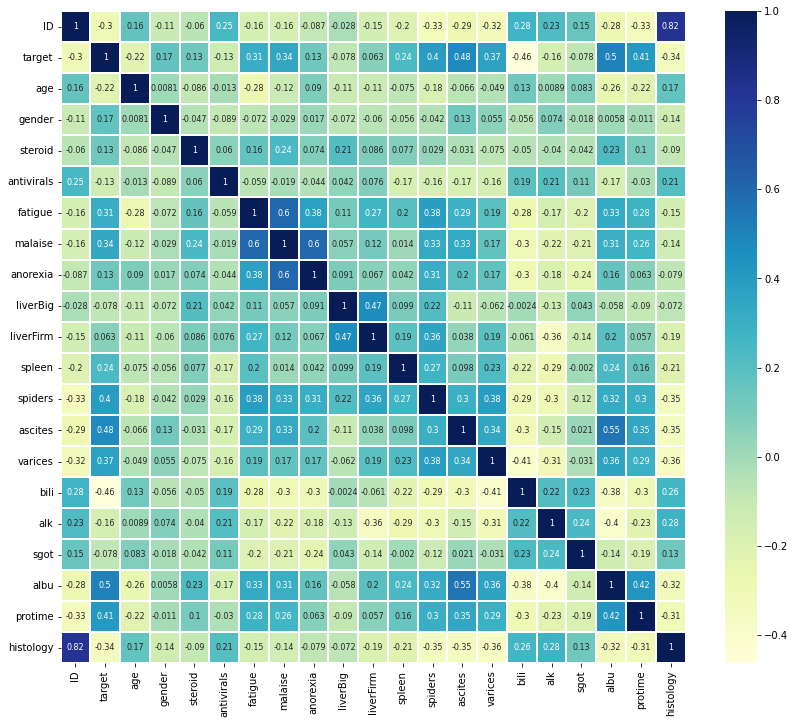

In [5]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

###### 3. Kiểm tra số lượng giá trị trong tập dữ liệu

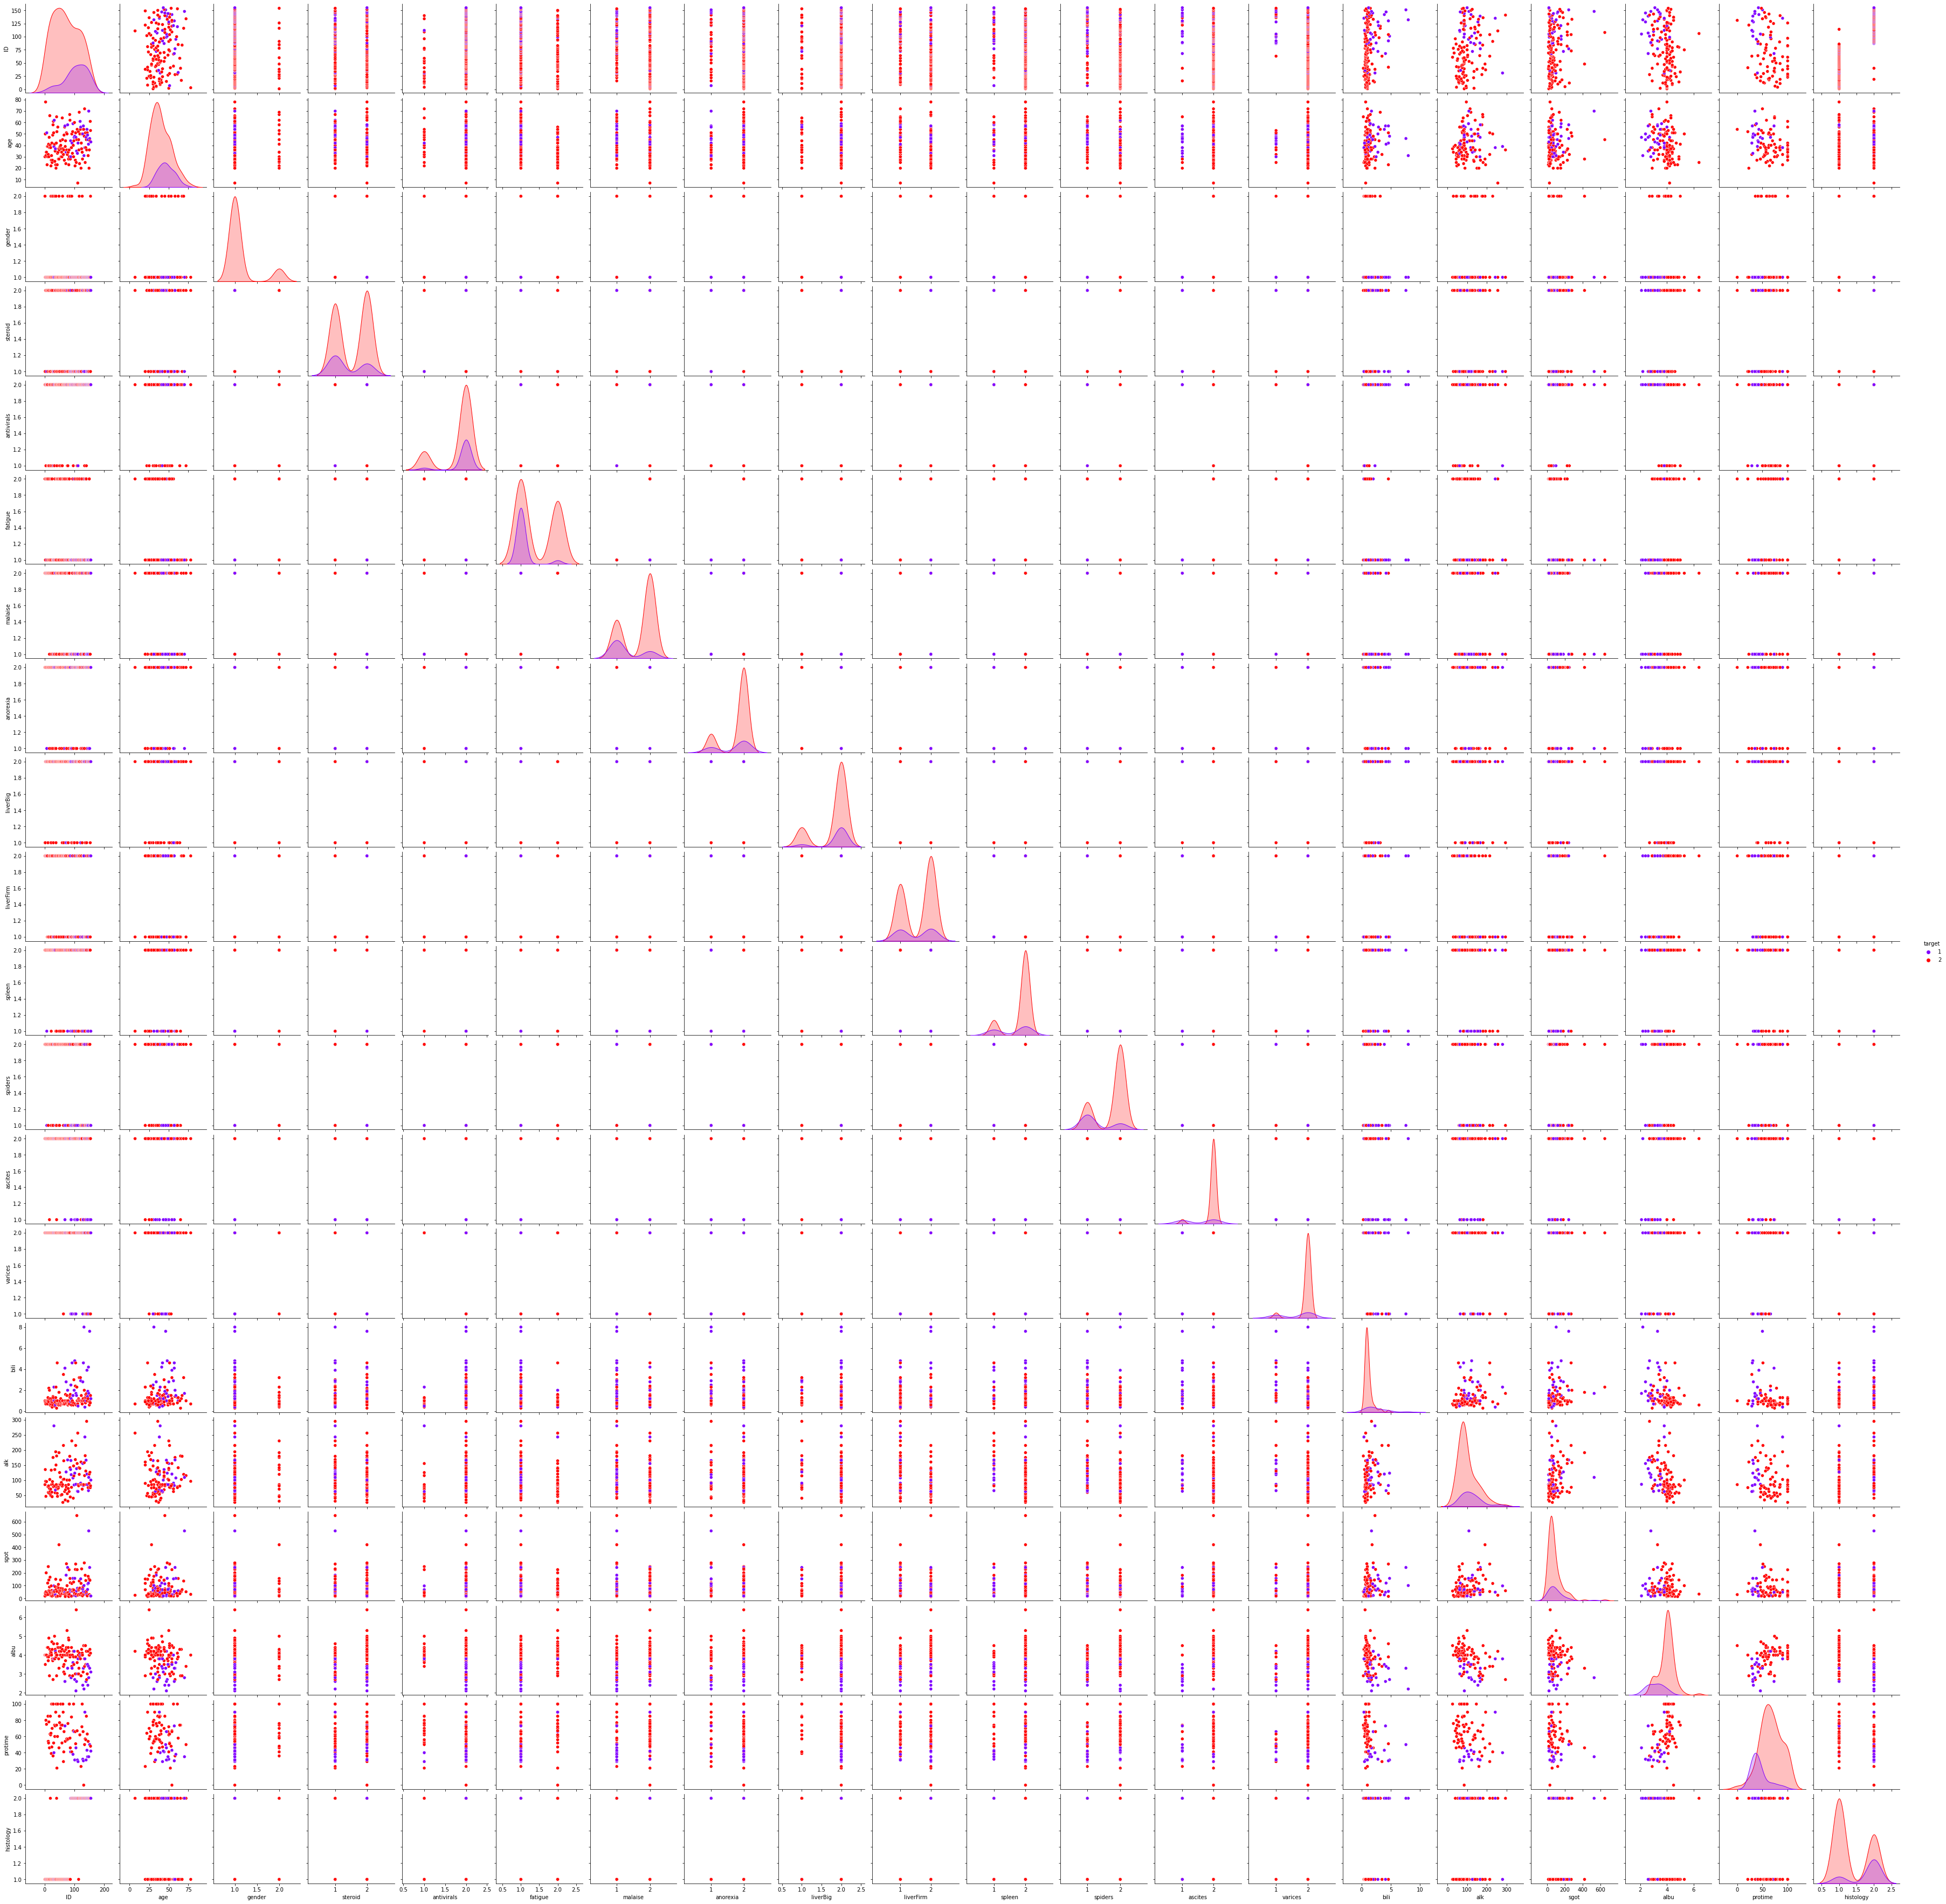

In [6]:
sns.pairplot(data, hue='target', palette="rainbow")

In [7]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


GridSpec(6, 6)

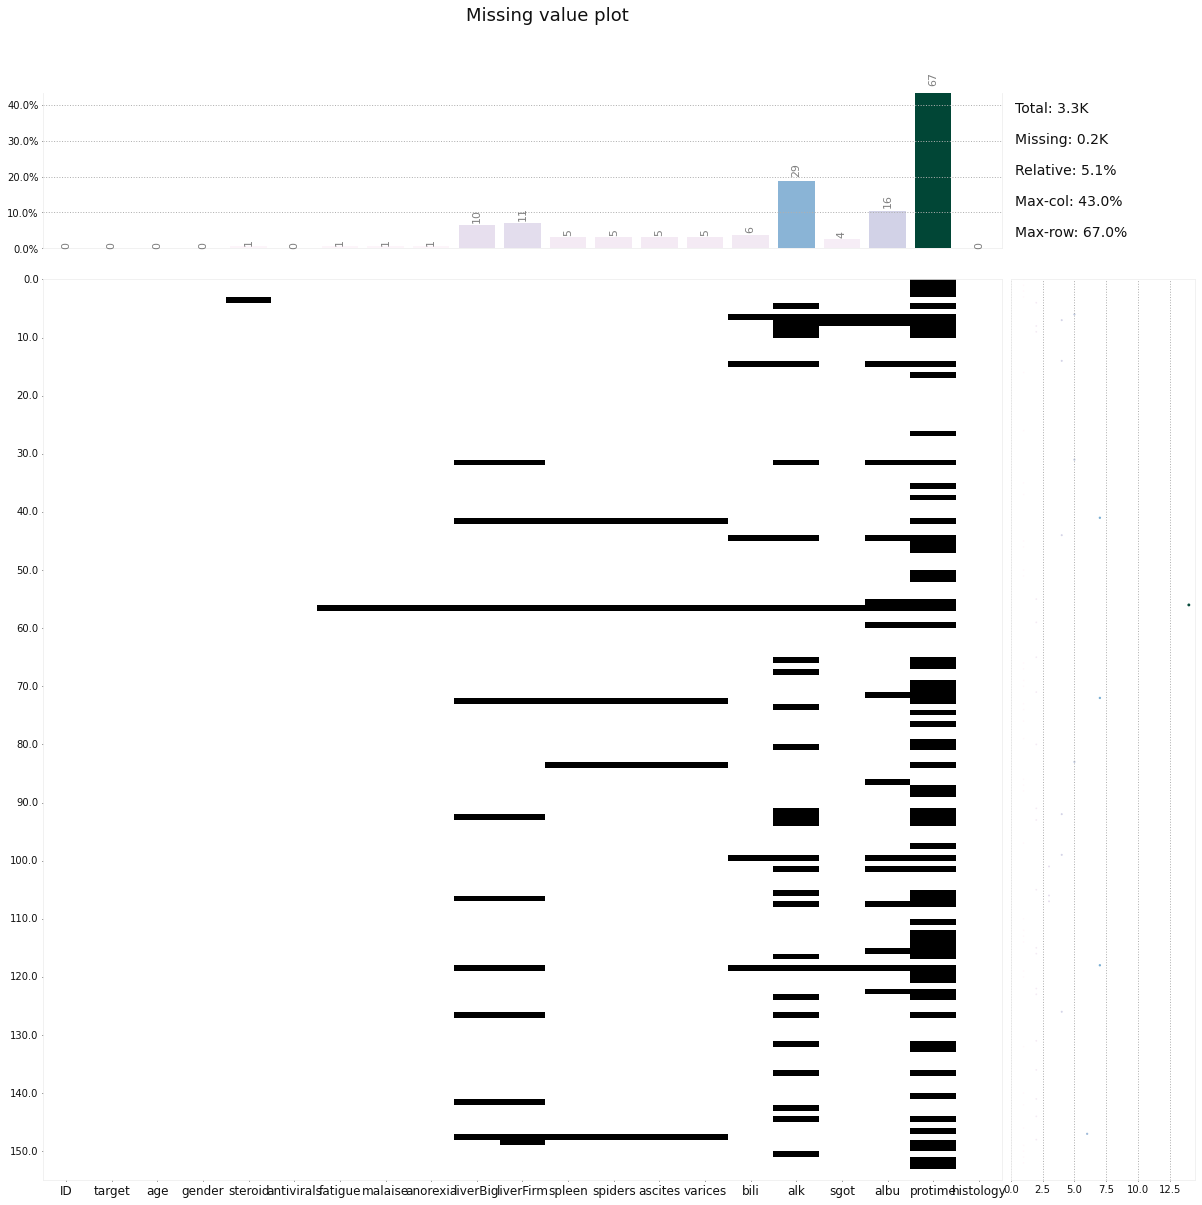

In [8]:
# Vẽ biểu đồ mô tả dữ liệu bị thiếu
import klib # Nhập thư viện
klib.missingval_plot(data) # Vẽ biểu đồ

In [9]:
data.target.value_counts()

2    123
1     32
Name: target, dtype: int64

<AxesSubplot:>

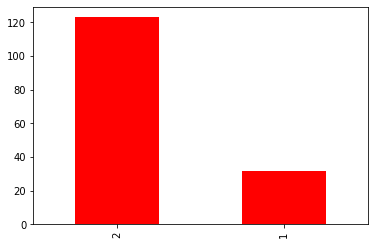

In [10]:
#Biểu đồ thể hiện live or die
data['target'].value_counts().plot(kind='bar', colormap='hsv')

#### 4. Kiểm tra kiểu dữ liệu của từng biến

In [11]:
data.dtypes

ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object

In [12]:
cat_cols = data.columns[data.nunique() < 5]
num_cols = data.columns[data.nunique() >= 5]

#### 5. Loại bỏ các cột không quan trọng

In [13]:
data.drop(["ID"], axis = 1, inplace=True)
num_cols = data.columns[data.nunique() >= 5]

In [14]:
data.head()

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


#### 6. Xác định các cột phân loại và lưu trữ chúng trong biến cat_cols và num_cols

In [15]:
num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

#### 7. Kiểm tra các giá trị null

In [16]:
data.isna().sum()
data.isnull().sum()

target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

#### 8. Chia dữ liệu thành X và y

In [17]:
X = data.drop(["target"], axis = 1)

In [18]:
y = data["target"]

In [19]:
print(X.shape, y.shape)

(155, 19) (155,)


#### 9. Chia dữ liệu thành X_train, X_test, y_train, y_test với test_size = 0.30 sử dụng sklearn

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 180)

In [21]:
## In hình dạng của X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 19)
(47, 19)
(108,)
(47,)


#### 10.Kiểm tra giá trị null trong train và test, kiểm tra value_counts trong y_train and y_test

In [22]:
print(y_train.value_counts()/X_train.shape[0])

2    0.805556
1    0.194444
Name: target, dtype: float64


In [23]:
print(y_test.value_counts()/X_test.shape[0])

2    0.765957
1    0.234043
Name: target, dtype: float64


In [24]:
# Gía trị null trong train
X_train.isna().sum()

age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig       5
liverFirm      6
spleen         2
spiders        2
ascites        2
varices        2
bili           4
alk           15
sgot           3
albu          11
protime       45
histology      0
dtype: int64

In [25]:
# Gía trị null trong test
X_test.isna().sum()

age            0
gender         0
steroid        0
antivirals     0
fatigue        0
malaise        0
anorexia       0
liverBig       5
liverFirm      5
spleen         3
spiders        3
ascites        3
varices        3
bili           2
alk           14
sgot           1
albu           5
protime       22
histology      0
dtype: int64

In [26]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [27]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(df_cat_train)

SimpleImputer(strategy='most_frequent')

In [28]:
df_cat_train = pd.DataFrame(cat_imputer.transform(df_cat_train), columns=cat_cols)

In [29]:
df_cat_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=cat_cols)

In [30]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [31]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(df_num_train[num_cols])

SimpleImputer(strategy='median')

In [32]:
df_num_train = pd.DataFrame ( num_imputer.transform(df_num_train), columns= num_cols)

In [33]:
df_num_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_cols)

In [34]:
# Kết hợp số và phân loại trong train
X_train = pd.concat([df_num_train, df_cat_train], axis = 1)

# Kết hợp số và phân loại trong test
X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [35]:
#Số lượng giá trị null trong tập giữ liệu train và test sau khi phân loại
X_train.isna().sum()
X_test.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

#### Chuyển đổi tất cả các cột phân loại thành định dạng số nguyên trước khi khử âm(2.0 as 2 etc.)

In [36]:
# Train
X_train[cat_cols] = X_train[cat_cols].astype('int')

# Test
X_test[cat_cols] = X_test[cat_cols].astype('int')

#### 12.Khử các cột phân loại

In [37]:
## Chuyển đổi cột phân loại thành biến thay thế
# Train
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

# Test
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [38]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2',
       'steroid_2', 'antivirals_2', 'fatigue_2', 'malaise_2', 'anorexia_2',
       'liverBig_2', 'liverFirm_2', 'spleen_2', 'spiders_2', 'ascites_2',
       'varices_2', 'histology_2'],
      dtype='object')

In [39]:
X_test.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2',
       'steroid_2', 'antivirals_2', 'fatigue_2', 'malaise_2', 'anorexia_2',
       'liverBig_2', 'liverFirm_2', 'spleen_2', 'spiders_2', 'ascites_2',
       'varices_2', 'histology_2'],
      dtype='object')

## XÂY DỰNG MÔ HÌNH - Decision Tree Algorithm

In [40]:
from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
Y_pred_dt = dt.predict(X_test)

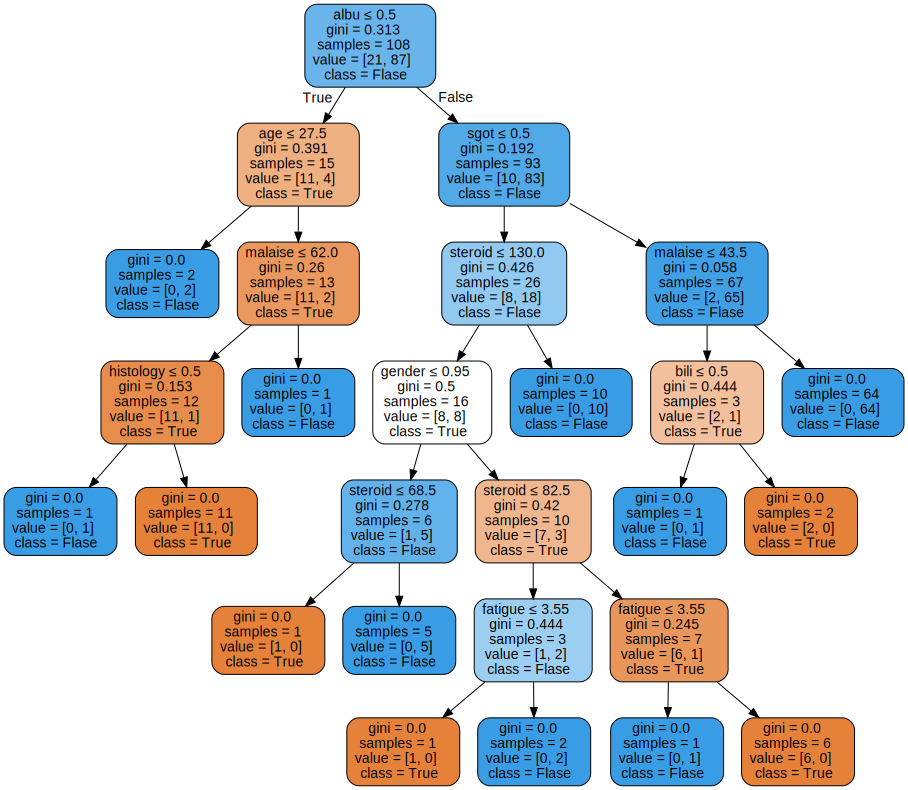

In [42]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeClassifier as clf
Y_name = ['True','Flase']
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
Y_pred_dt = clf.predict(X_test)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph

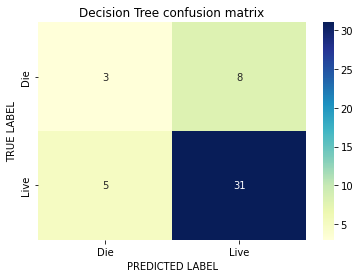

In [43]:
# # Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_dt)
cm_matrix = pd.DataFrame(data=cm, columns=['Die', 'Live'], 
                                 index=['Die', 'Live'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Decision Tree confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL');

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
print("KẾT QUẢ:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(y_test, Y_pred_dt)))
res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình theo phương pháp xác thực chéo
print('Độ chính xác trung bình phương pháp xác thực chéo:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test))))
#Điểm chính xác 
print("Độ chính xác:\t\t{}%".format(round(dt.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           1       0.38      0.27      0.32        11
           2       0.79      0.86      0.83        36

    accuracy                           0.72        47
   macro avg       0.58      0.57      0.57        47
weighted avg       0.70      0.72      0.71        47


Độ chính xác trung bình phương pháp xác thực chéo:	0.7700

Độ lệch chuẩn:	0.1887

Ma trận nhầm lẫn:
[[ 5  6]
 [ 8 28]]

Độ chính xác:		70.21%


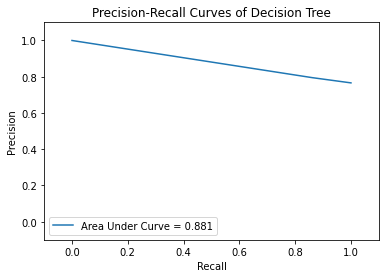

In [45]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_dt,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

## XÂY DỰNG MÔ HÌNH - Support Vector Machine Algorithm

In [46]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train,y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [47]:
Y_pred_svm = svm.predict(X_test)

In [48]:
# IN MA TRẠN NHẦM LẪN VÀ CHIA NÓ THÀNH 4 PHẦN+
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_svm)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 1 10]
 [ 0 36]]

True Positives(TP) =  1

True Negatives(TN) =  36

False Positives(FP) =  10

False Negatives(FN) =  0


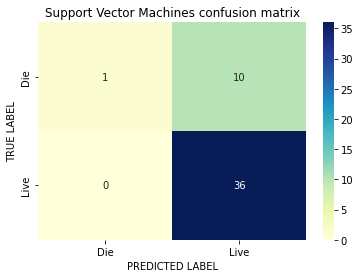

In [49]:
# Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_svm)
cm_matrix = pd.DataFrame(data=cm, columns=['Die', 'Live'], 
                                 index=['Die', 'Live'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Support Vector Machines confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL');

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
print("KẾT QUẢ:\n")
#Report
print('Support Vector Machines Classifier Report:\n\n{}\n'.format(classification_report(y_test, Y_pred_svm)))
res = cross_val_score(svm, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test))))
#Điểm chính xác
print("Độ chính xác:\t\t{}%".format(round(svm.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Support Vector Machines Classifier Report:

              precision    recall  f1-score   support

           1       1.00      0.09      0.17        11
           2       0.78      1.00      0.88        36

    accuracy                           0.79        47
   macro avg       0.89      0.55      0.52        47
weighted avg       0.83      0.79      0.71        47


Độ chính xác trung bình:	0.7650

Độ lệch chuẩn:	0.0594

Ma trận nhầm lẫn:
[[ 1 10]
 [ 0 36]]

Độ chính xác:		78.72%


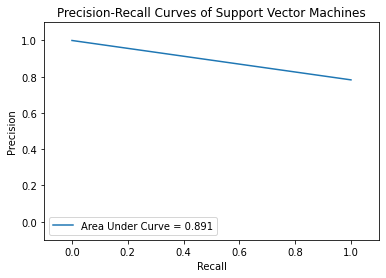

In [51]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_svm,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Support Vector Machines')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

## XÂY DỰNG MÔ HÌNH - Random forest Algorithm

In [52]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [53]:
Y_pred_rf = rf.predict(X_test)

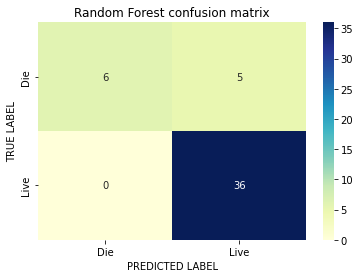

In [54]:
# Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['Die', 'Live'], 
                                 index=['Die', 'Live'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Random Forest confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL');

In [55]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("KẾT QUẢ:\n")
#Report
print('Random Forest Classifier report:\n\n{}\n'.format(classification_report(y_test, Y_pred_rf)))
res = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test))))
#Điểm chính xác
print("Độ chính xác:\t\t{}%".format(round(rf.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Random Forest Classifier report:

              precision    recall  f1-score   support

           1       1.00      0.55      0.71        11
           2       0.88      1.00      0.94        36

    accuracy                           0.89        47
   macro avg       0.94      0.77      0.82        47
weighted avg       0.91      0.89      0.88        47


Độ chính xác trung bình:	0.8750

Độ lệch chuẩn:	0.1632

Ma trận nhầm lẫn:
[[ 6  5]
 [ 0 36]]

Độ chính xác:		89.36%


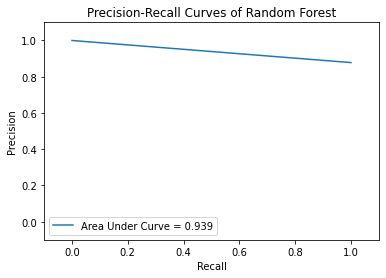

In [56]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_rf,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

## XÂY DỰNG MÔ HÌNH - Ada Boost Algorithm

In [57]:
import time # Hỗ trợ tính thời gian huấn luyện 
import matplotlib.pyplot as plt # Hỗ trợ vẽ biểu đồ

In [58]:
# Chèn mô đun ma trận scikit-learn để tính toàn độ chính xác, ma trận nhầm lẫn và báo cáo phân loại 
from sklearn.metrics import accuracy_score # So sánh độ chính xác 
from sklearn.metrics import classification_report # Tổng hợp báo cáo phân loại 
from sklearn.metrics import confusion_matrix # Tính ma trận nhầm lẫn

In [59]:
# Nhập về thư viện phân lớp AdaBoost từ sklearn 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression

In [60]:
# Tạo đối tượng phân lớp AdaBoost sử dụng cây quyết định 
adb_c = AdaBoostClassifier(n_estimators = 10, learning_rate = 1, random_state = 0)

In [61]:
# Tạo đối tượng phân lớp AdaBoost sử dụng hồi quy logistic 
adb_c2 = AdaBoostClassifier(n_estimators = 10, learning_rate = 1, random_state = 0, base_estimator=LogisticRegression(max_iter=200))

In [62]:
# Huấn luyện phân lớp AdaBoost với cây quyết định 
start = time.time() 
h_model = adb_c.fit(X_train, y_train) 
stop = time.time() 
print(f"Thời gian huấn luyện sklearn của Ada Boost sử dụng cây quyết định: {stop - start}s") 
train_err = (h_model.predict(X_train) != y_train).mean() 
print(f'Lỗi huấn luyện: {train_err:.1%}')

Thời gian huấn luyện sklearn của Ada Boost sử dụng cây quyết định: 0.016121625900268555s
Lỗi huấn luyện: 5.6%


In [63]:
# Huấn luyện phân lớp AdaBoost với hồi quy logistic 
start = time.time() 
h_model2 = adb_c2.fit(X_train, y_train) 
stop = time.time() 
print(f"Thời gian huấn luyện sklearn của Ada Boost sử dụng hồi quy logistic: {stop - start}s") 
train_err = (h_model2.predict(X_train) != y_train).mean() 
print(f'Lỗi huấn luyện: {train_err:.1%}')

Thời gian huấn luyện sklearn của Ada Boost sử dụng hồi quy logistic: 0.20094704627990723s
Lỗi huấn luyện: 10.2%


In [64]:
# Dự đoán câu trả lời cho các dữ liệu thử nghiệm 
y_pred = h_model.predict(X_test) 
y_pred2 = h_model2.predict(X_test)

In [65]:
# Báo cáo kết quả phân loại của thuật toán Ada Boost trên cây quyết định 
accuracy = accuracy_score(y_test,y_pred)*100 
report = classification_report(y_pred, y_test) 
cm = confusion_matrix(y_test, y_pred) 
print("Báo cáo kết quả phân loại:") 
#Độ chính xác trung bình
res = cross_val_score(adb_c, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
print("Độ chuẩn xác: ", accuracy) 
print(report) 
print("Ma trận nhầm lẫn:") 
print(cm)

Báo cáo kết quả phân loại:
Độ chính xác trung bình:	0.8300

Độ chuẩn xác:  89.36170212765957
              precision    recall  f1-score   support

           1       0.55      1.00      0.71         6
           2       1.00      0.88      0.94        41

    accuracy                           0.89        47
   macro avg       0.77      0.94      0.82        47
weighted avg       0.94      0.89      0.91        47

Ma trận nhầm lẫn:
[[ 6  5]
 [ 0 36]]


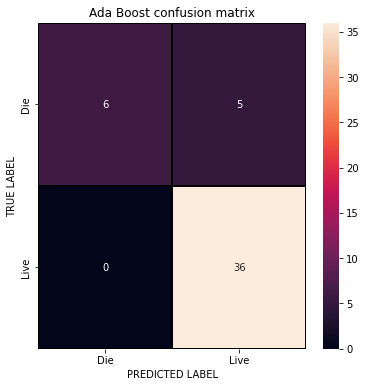

In [66]:
# Đồ họa hóa ma trận nhầm lẫn 
cfm_nb = confusion_matrix(y_test, y_pred) 
x_axis_labels = ['Die', 'Live'] # với die là 1, live là 2 
y_axis_labels = ['Die', 'Live'] 
f, ax = plt.subplots(figsize =(6,6)) 
sns.heatmap(cfm_nb, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels) 
plt.title('Ada Boost confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL'); 
#plt.savefig("nbcm.png", format='png', dpi=150, bbox_inches='tight') 
plt.show()

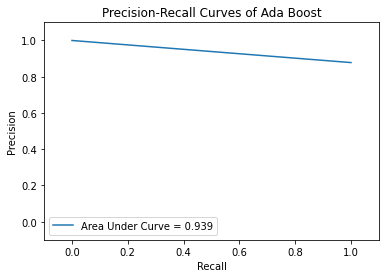

In [67]:
# Đồ thị hóa đường cong PR của Ada Boost Cây quyết định (Precision-Recall Curves) 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label = 2) 
area = auc(recall, precision) 
plt.figure() 
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area) 
plt.legend(loc = 'lower left') 
plt.title('Precision-Recall Curves of Ada Boost') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.ylim([-0.1, 1.1]) 
plt.xlim([-0.1, 1.1]) 
plt.show()

In [68]:
# Báo cáo kết quả phân loại của thuật toán Ada Boost trên hồi quy logistic 
accuracy = accuracy_score(y_test,y_pred2) 
report = classification_report(y_pred2, y_test) 
cm = confusion_matrix(y_test, y_pred2) 
print("Báo cáo kết quả phân loại:") 
#Độ chính xác trung bình
res = cross_val_score(adb_c2, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
print("Độ chuẩn xác: ", accuracy) 
print(report) 
print("Ma trận nhầm lẫn:") 
print(cm)

Báo cáo kết quả phân loại:
Độ chính xác trung bình:	0.8150

Độ chuẩn xác:  0.8723404255319149
              precision    recall  f1-score   support

           1       0.55      0.86      0.67         7
           2       0.97      0.88      0.92        40

    accuracy                           0.87        47
   macro avg       0.76      0.87      0.79        47
weighted avg       0.91      0.87      0.88        47

Ma trận nhầm lẫn:
[[ 6  5]
 [ 1 35]]


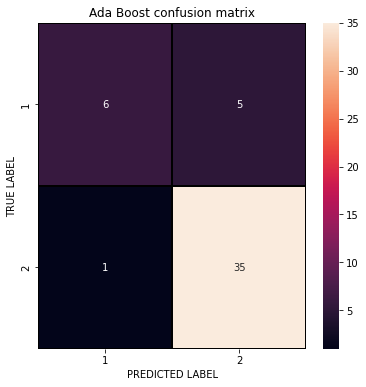

In [69]:
# Đồ họa hóa ma trận nhầm lẫn 
cfm_nb2 = confusion_matrix(y_test, y_pred2) 
x_axis_labels = [1, 2] # với die là 1, live là 2 
y_axis_labels = [1, 2] 
f, ax = plt.subplots(figsize =(6,6)) 
sns.heatmap(cfm_nb2, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels) 
plt.title('Ada Boost confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL'); 
plt.show()

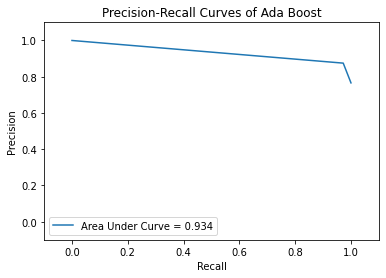

In [70]:
# Đồ thị hóa đường cong PR của Ada Boost Hồi quy Logistic (Precision-Recall Curves) 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred2, pos_label = 2)
area = auc(recall, precision) 
plt.figure() 
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area) 
plt.legend(loc = 'lower left') 
plt.title('Precision-Recall Curves of Ada Boost') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.ylim([-0.1, 1.1]) 
plt.xlim([-0.1, 1.1]) 
plt.show()